<a href="https://colab.research.google.com/github/MehrdadJalali-AI/Statistics-and-Machine-Learning/blob/main/Day10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Concepts
This notebook covers key concepts in machine learning: clustering, time series prediction, model selection strategies, and hyperparameter tuning.

## Clustering
Clustering groups similar data points to discover patterns and structures. We will explore two popular clustering techniques: **K-Means** and **DBSCAN**.

### K-Means Clustering
K-Means is an unsupervised learning algorithm that partitions data into `K` distinct clusters by minimizing the distance between points and their assigned cluster centroids.

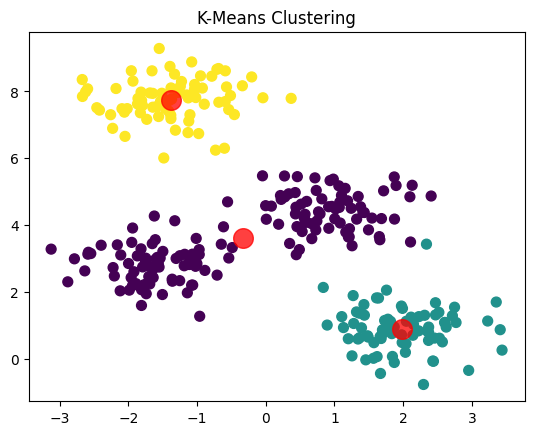

0.5890390393551768


In [11]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title("K-Means Clustering")
plt.show()

sil_score = silhouette_score(X, y_kmeans)
print(sil_score)



### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
DBSCAN clusters data based on density, making it effective for finding clusters of varying shapes and handling noise in the data.

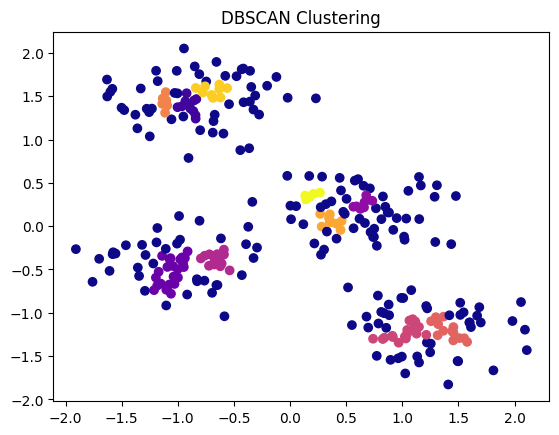

In [9]:

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize features
X = StandardScaler().fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()


## Time Series Prediction
Time series data consists of sequential observations over time. We’ll create a simple example to demonstrate forecasting using linear regression.

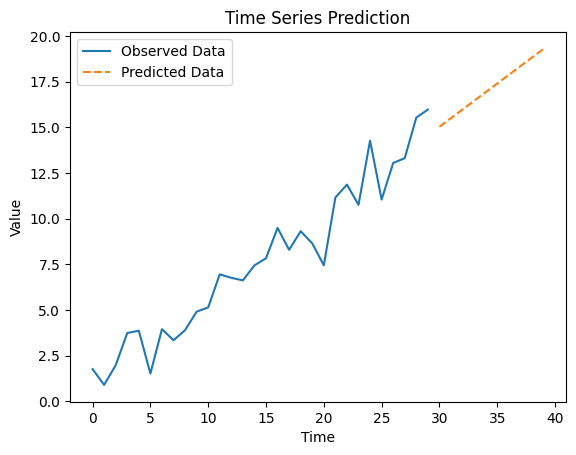

In [ ]:

import pandas as pd
from sklearn.linear_model import LinearRegression

# Generate synthetic time series data
np.random.seed(0)
time = np.arange(30)
values = time * 0.5 + np.random.normal(size=time.size)

# Prepare data for training
time = time.reshape(-1, 1)
values = values.reshape(-1, 1)
model = LinearRegression()
model.fit(time, values)

# Predict future values
future_time = np.arange(30, 40).reshape(-1, 1)
predictions = model.predict(future_time)

# Plot results
plt.plot(time, values, label="Observed Data")
plt.plot(future_time, predictions, label="Predicted Data", linestyle="--")
plt.title("Time Series Prediction")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()


## Model Selection Strategies
Selecting the right model involves balancing complexity and performance, often using domain knowledge and a trial-and-error approach to evaluate different models.


1. **Domain Knowledge**: Understand the nature of the data and the problem to select appropriate models.
2. **Trial and Error**: Test multiple models to find the best one for your data and requirements.
3. **Complexity vs. Performance**: Consider simpler models when resources are limited and evaluate performance trade-offs.


## Hyperparameter Tuning
Hyperparameter tuning involves optimizing settings for a model to improve performance. **Grid Search** is a common technique for finding the best parameter combination.

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Define a model and hyperparameter grid
model = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X, y)

# Display best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'n_estimators': 10}
Best Accuracy: 0.9666666666666667
